# Python-in-the-lab: introduction to the classes II

In [1]:
import os
import numpy as np
import scipy.integrate as integrate
import matplotlib.pylab as plt
%matplotlib inline
import distributions2 as d2

In [2]:
mainDir = "/home/gf/src/Python/Python-in-the-lab/Bk"
dcoll = d2.DistCollector(mainDir)

{'E', 'v', 'T', 'S'}
['/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_E.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.02_E.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_E.dat']
9 lines deleted
8 lines deleted
8 lines deleted
['/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_v.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.02_v.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_v.dat']
2 lines deleted
0 lines deleted
0 lines deleted
['/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_T.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.02_T.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_T.dat']
23 lines deleted
18 lines deleted
21 lines deleted
['/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_S.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.02_S.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_S.dat']
14 lines deleted
12 lines deleted
14 lines deleted


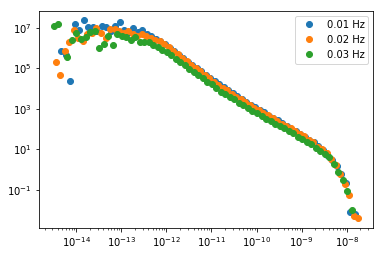

In [3]:
dcoll.plot("S") # Isn't it beatifull???

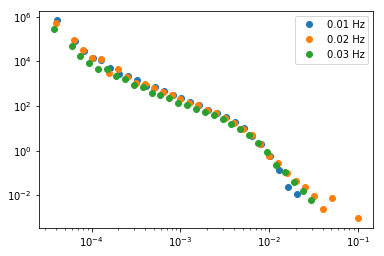

In [4]:
dcoll.plot("T") # Isn't it beatifull???

KeyError: 't'

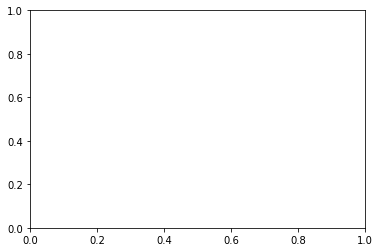

In [5]:
dcoll.plot("t") # Ahhhhhhhhhhhhhhhhhhhhhhh

He is right... I was wrong, I know... I typed 't' instead of 'T'. so?

# from distribution2
    def plot(self, dis_type, loglog=True):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        
# It is better to check immediately if the dis_type is correct, otherwise exit
[...]

    self.dis_types = self._get_distribution_types(maxLen)
    print(self.dis_types)
    self.distrs = dict()
    for dis_type in self.dis_types:
[...]

    def plot(self, dis_type, loglog=True):
        if not dis_type in self.dis_types:
            print("Type %s does not exist, please check it")
            return
        fig = plt.figure()
        ax = fig.add_subplot(111)

In [6]:
import distributions3 as d3

dcoll = d3.DistCollector(mainDir)

{'E', 'v', 'T', 'S'}
['/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_E.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.02_E.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_E.dat']
9 lines deleted
8 lines deleted
8 lines deleted
['/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_v.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.02_v.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_v.dat']
2 lines deleted
0 lines deleted
0 lines deleted
['/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_T.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.02_T.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_T.dat']
23 lines deleted
18 lines deleted
21 lines deleted
['/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_S.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.02_S.dat', '/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_S.dat']
14 lines deleted
12 lines deleted
14 lines deleted


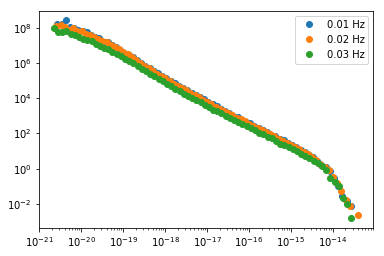

In [7]:
dcoll.plot('E')

In [8]:
dcoll.plot('t')

Type t does not exist, please check it


## Problem
Check distributions*.py and add the info about the axis, considering this scheme:
    * [distribution_type, x-axis, y-axis, title]
    * S, size S, P(S), size distribution
    * T, duration T, P(T), duration distribution
    * E, energy E, P(E), energy distribution
    * v, velocity v, P(v), velocity distribution

so they appear in the plot as xlabel, ylabel and title

In [9]:
names = {'S': 'size', 'T': 'duration', 'E': 'energy', 'v': 'velocity'}
class Labels:
    def __init__(self, dis_type):
        try:
            lb = names[dis_type]
        except KeyError:
            print("Distribution type %s not valid" % dis_type)
            sys.exit()
        name = names[dis_type]
        self.xlabel, self.ylabel, self.title = "{0} {1}".format(name, dis_type), "P({})".format(dis_type), "{} distribution".format(name)

In [10]:
lbS = Labels('S')

In [11]:
lbS.title, lbS.xlabel, lbS.ylabel

('size distribution', 'size S', 'P(S)')

In [12]:
# As a better alternative...
class Labels:
    def __init__(self, dis_type):
        try:
            lb = names[dis_type]
        except KeyError:
            print("Distribution type %s not valid" % dis_type)
            sys.exit()
        self.name = names[dis_type]
        self.dis_type = dis_type
        
    @property
    def xlabel(self):
        return "{0} {1}".format(self.name, self.dis_type)
    
    @property
    def ylabel(self):
        return "P({})".format(self.dis_type)
    
    @property
    def title(self):
        return "{} distribution".format(self.name)

In [13]:
lb = Labels('T')
lb.title, lb.xlabel, lb.ylabel

('duration distribution', 'duration T', 'P(T)')

In [14]:
# You can instert this in the distributions3.py for instance